In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(style = "white")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_json('data/fine_filtered2020.json.bz2', lines=True, compression='bz2')

# Quote length histogram

Caclulcate size of each quote and show their length distribution in form of a log-lin histogram.

In [4]:
import nltk
from nltk import word_tokenize
import string

def count_words(sentence):
    # maybe use advanced features from NLTK
    return len(sentence.split())

In [5]:
sentence_lengths = df.apply(lambda row: count_words(row.quotation), axis=1).rename('length').reset_index()
sentence_lengths

,index,length
0,0,27
1,1,62
2,2,47
3,3,23
4,4,30
...,...,...
4267,4267,25
4268,4268,55
4269,4269,35
4270,4270,53


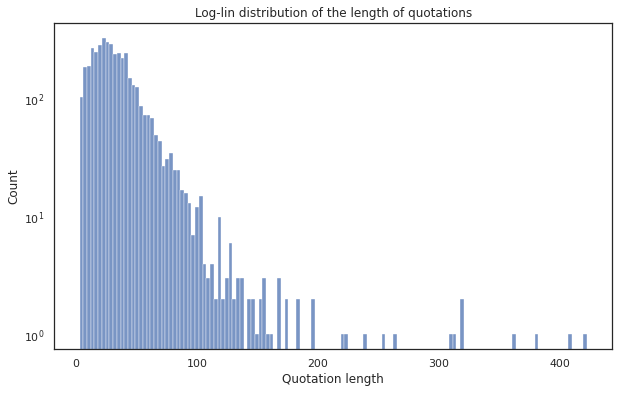

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=sentence_lengths, x='length', ax=ax)

ax.set_yscale('log')
ax.set(title='Log-lin distribution of the length of quotations', xlabel='Quotation length')

plt.show()

# Wordcloud

In this section we are going to create wordcloud based on frequency of each word in quotations.

In [42]:
import nltk

from nltk import word_tokenize
from collections import Counter
from functools import reduce

from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punct')
nltk.download('brown')

from textblob import TextBlob

# Old way
# def get_word_frequencies(sentence, stop_wrods):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
#     return Counter(tokens)

# New way
def get_word_frequencies(sentence):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
    return Counter(TextBlob(sentence).noun_phrases)


[nltk_data] Downloading package stopwords to /home/milos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package brown to /home/milos/nltk_data...
[nltk_data]   Package brown is already up-to-date!


First we calculate frequency of each word:

In [43]:
word_frequencies = Counter()
for sentence_freq in map(get_word_frequencies, list(df['quotation'])):
    word_frequencies.update(sentence_freq)

In the next step we create a wordcloud based on the calculated word frequencies. The word cloud contains top 200 most frequent words (stopwords excluded).

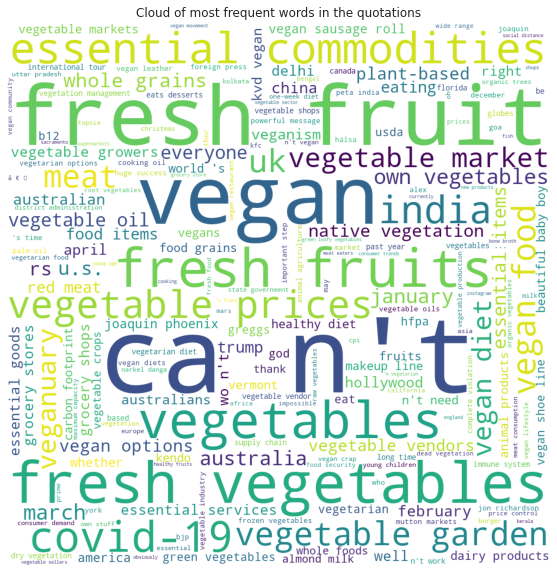

In [44]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

USE_MASK = False # by setting to True, it will use cow mask to display wordcloud
WC_BACKGROUND = 'white'
MAX_WORDS = 200
WC_WIDTH, WC_HEIGHT = 1000, 1000
STOPWORDS = stopwords.words('english')

if USE_MASK:
    # Source: https://www.flaticon.com/free-icon/cow-silhouette_62470
    image_mask = 255 - np.array(Image.open('./cow_mask.png'))
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS, 
        mask=image_mask, 
        contour_width=1, 
        contour_color='green')
else:
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS)

# Calculate wordcloud
wc = word_cloud.generate_from_frequencies(word_frequencies)

# Plot wordcloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc)
ax.axis('off')
ax.set(title='Cloud of most frequent words in the quotations')
plt.show()

# Other

In [16]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.strftime('%b %Y'))
df.index = pd.to_datetime(df['date'])
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
date,,,,,,,,,
2020-03-01,2020-03-18-001607,a special lifelong animal advocate.,None,[],Mar 2020,1,"[[None, 0.8046], [Betty White, 0.085], [Winona...",[https://www.nbc15.com/content/news/Henry-Vila...,E
2020-02-01,2020-02-19-002557,Academic environments are not the best places ...,Lewis Von Thaer,[Q22096796],Feb 2020,2,"[[Lewis Von Thaer, 0.5349], [None, 0.2953], [C...",[https://www.thelantern.com/2020/02/student-co...,E
2020-04-01,2020-04-03-002052,After talking with Chris about his background ...,Brad Smith,"[Q15477554, Q16218831, Q23664265, Q24084114, Q...",Apr 2020,1,"[[Brad Smith, 0.7482], [None, 0.2469], [Chris ...",[http://www.hmenews.com/article/brief-package-...,E
2020-03-01,2020-03-29-001856,Animal caretaker Ambre Cook talks about the re...,None,[],Mar 2020,2,"[[None, 0.6996], [Sarah Silverman, 0.3004]]",[http://newsok.com/article/5658897/interviews-...,E
2020-02-01,2020-02-02-004706,Because this hardworking talented human of min...,Ashwiny Iyer Tiwari,[Q28012317],Feb 2020,2,"[[Ashwiny Iyer Tiwari, 0.4128], [None, 0.3853]...",[https://www.hindustantimes.com/bollywood/kang...,E
...,...,...,...,...,...,...,...,...,...
2020-03-01,2020-03-19-074484,This is not an ethical way to deal with crime ...,Nivedita Menon,[Q16733425],Mar 2020,2,"[[Nivedita Menon, 0.8647], [None, 0.1353]]",[https://www.dw.com/en/delhi-bus-gang-rape-con...,E
2020-03-01,2020-03-12-079906,We are successfully transitioning the plastic ...,Donald Thomson,[Q43395158],Mar 2020,1,"[[Donald Thomson, 0.8117], [None, 0.1883]]",[https://www.waste360.com/design-and-construct...,E
2020-02-01,2020-02-09-052059,We found that microbes may be the necessary li...,Eric Griffin,"[Q1351311, Q16887676, Q728728]",Feb 2020,1,"[[Eric Griffin, 0.6314], [None, 0.3686]]",[https://www.abqjournal.com/1418350/little-thi...,E


[Text(0.5, 0, 'Month')]

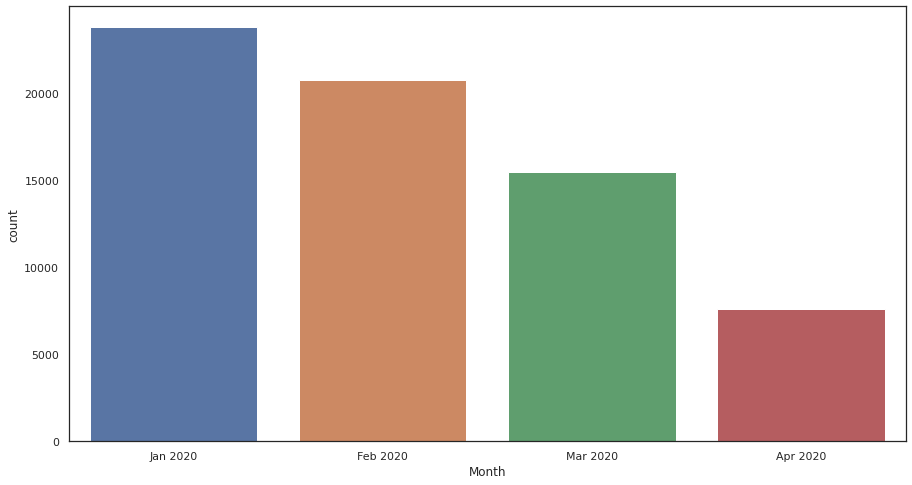

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='date', ax=ax, order=['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020'])

ax.set(xlabel='Month')
# sns.despine(bottom = True, left = True)

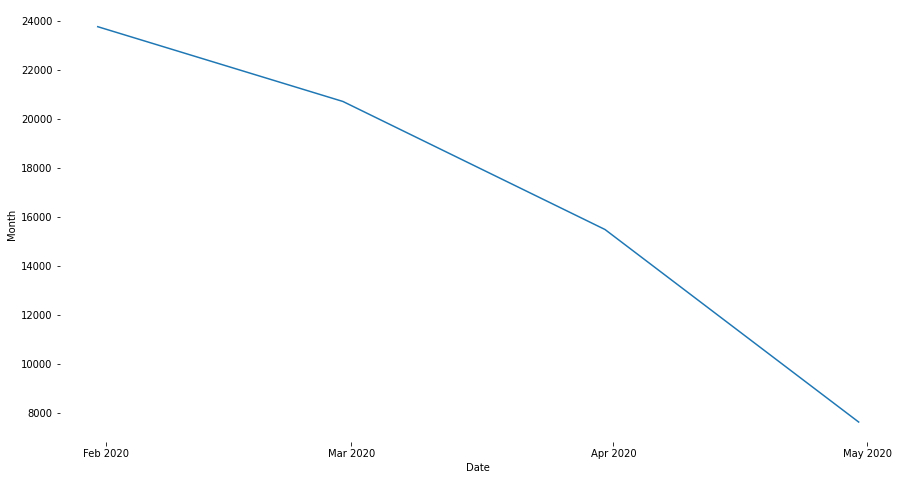

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data = df.groupby(pd.Grouper(freq='M')).size(), ax=ax)
sns.despine(bottom = True, left = True)

ax.set(xlabel='Date', ylabel='Month')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# fig.autofmt_xdate()

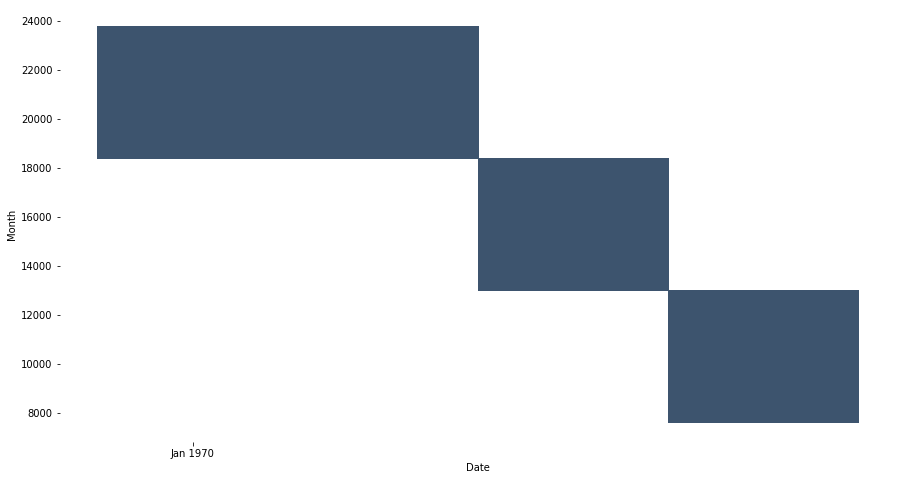

In [66]:
date_counts = df.groupby(pd.Grouper(freq='M')).size().rename('count').reset_index()
date_counts['date'] = date_counts['date'].apply(lambda x: x.replace(day=1))

fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = date_counts, x='date', y='count', ax=ax)
sns.despine(bottom = True, left = True)

ax.set(xlabel='Date', ylabel='Month')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

<AxesSubplot:ylabel='Count'>

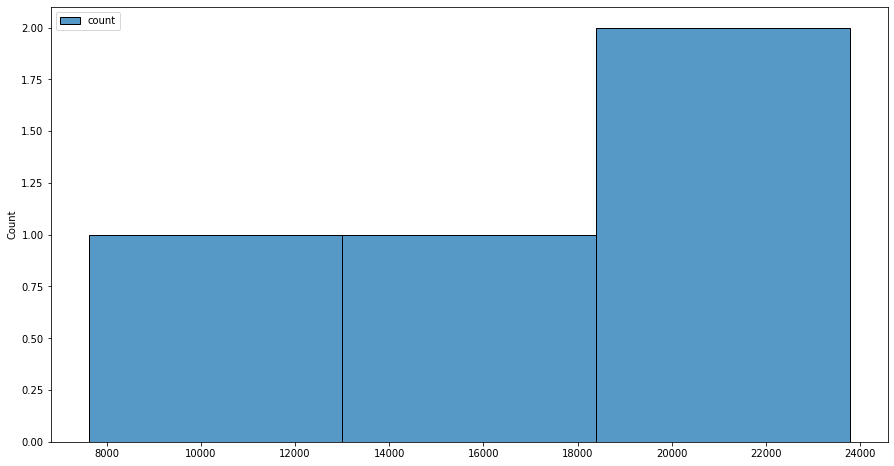

In [80]:
date_counts = df.groupby(pd.Grouper(freq='M')).size().rename('count').reset_index()
date_counts['date'] = date_counts['date'].apply(lambda x: x.replace(day=1).strftime('%b %Y'))
date_counts

fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = date_counts, ax=ax)

In [2]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def prepare_tokens(tokens, stemmer):
  return map(
      # to avoid any multithreading issues, stemmer is always passed from outside
      stemmer.stem, 
      map(lambda word: word.lower(), tokens)
  )

def is_topic_related(text, term_set_to_look_for, stemmer):
  tokens = prepare_tokens(word_tokenize(text), stemmer)
  return bool(set(tokens) & term_set_to_look_for)

class ChunkProcessingFilter:
  def __init__(self, *terms_to_look_for):
    self.set_to_look_for = set(
        prepare_tokens(terms_to_look_for, PorterStemmer()))

  def __call__(self, chunk):
    stemmer = PorterStemmer()
    mask = chunk.apply(
        lambda row: is_topic_related(
            row.quotation, self.set_to_look_for, stemmer),
        axis=1)
    return chunk[mask]


filtered_df = pd.read_json('data/filtered2020.json.bz2', lines=True, compression='bz2')
processing_filter = ChunkProcessingFilter('vegan', 'vegetarian', 'veget', 'plant-based')


[nltk_data] Downloading package stopwords to /home/milos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/milos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
fine_filtered_df = processing_filter(filtered_df)

In [7]:
fine_filtered_df.to_json('data/fine_filtered2020.json.bz2', compression='bz2', orient='records', lines=True)

In [12]:
fine_filtered_df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
18,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E
25,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E
49,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E
54,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E
69,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E
...,...,...,...,...,...,...,...,...,...
67564,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E
67565,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E
67572,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E
67585,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E


In [30]:
from urllib.parse import urlencode

import requests

def qids_to_query_param(qids):
    return '|'.join(qids)

def wikidata_api_url_maker(qids):
    query_params = {
        'action': 'wbgetentities',
        'languages': 'en',
        'format': 'json',
        'ids': qids_to_query_param(qids)
    }
    API_URL = 'https://www.wikidata.org/w/api.php'
    return f'{API_URL}?{urlencode(query_params)}'

def get_data_for_qids(*qids):
    query_params = {
        'action': 'wbgetentities',
        'languages': 'en',
        'format': 'json',
        'ids': qids_to_query_param(qids)
    }
    API_URL = 'https://www.wikidata.org/w/api.php'
    return requests.get(url=API_URL, params=query_params).json()

# def get_items(*qids):
wikidata_api_url_maker('Q1')

'https://www.wikidata.org/w/api.php?action=wbgetentities&languages=en&format=json&ids=Q%7C1'

In [18]:
qids = set()
for i, row in fine_filtered_df.iterrows():
    if row.qids:
        qids.add(row.qids[0])

In [33]:
from itertools import islice

qids50 = list(islice(qids, 50))

data = get_data_for_qids(*qids50)

In [40]:
data

dict_keys(['entities', 'success'])

In [41]:
qids_list = list(qids)
chunksize = 50

entities = {}

for i in range(0, len(qids_list), chunksize):
    qids_chunk = qids_list[i:i + chunksize]
    entities.update(get_data_for_qids(*qids_chunk)['entities'])

In [47]:
entities.keys()

dict_keys(['Q11035229', 'Q3018841', 'Q21928810', 'Q1255395', 'Q16214495', 'Q1635374', 'Q16200868', 'Q43393952', 'Q19646504', 'Q20712972', 'Q16194661', 'Q6874368', 'Q4479795', 'Q18336221', 'Q56754222', 'Q6408326', 'Q16732252', 'Q2580649', 'Q6146878', 'Q45445349', 'Q21062714', 'Q21454076', 'Q6724272', 'Q5125318', 'Q19376633', 'Q16842175', 'Q29865893', 'Q15994548', 'Q57095274', 'Q7498870', 'Q19519383', 'Q6187255', 'Q1680455', 'Q167636', 'Q18249361', 'Q14950943', 'Q22096751', 'Q58097619', 'Q6141166', 'Q42157463', 'Q18814', 'Q10496058', 'Q201608', 'Q57418743', 'Q1132611', 'Q7326005', 'Q19520038', 'Q3628753', 'Q28555345', 'Q59504369', 'Q57684910', 'Q2170918', 'Q781167', 'Q16189407', 'Q23416653', 'Q1286476', 'Q3660614', 'Q560178', 'Q6892960', 'Q31213302', 'Q42586931', 'Q2156967', 'Q56379898', 'Q56441240', 'Q3339740', 'Q7291655', 'Q5125290', 'Q20010869', 'Q25189623', 'Q42315001', 'Q27830948', 'Q318511', 'Q9057035', 'Q6396846', 'Q16135316', 'Q43078589', 'Q3099714', 'Q27898368', 'Q30506253', 'Q5

In [135]:
def transform_entry(s):
    if s.get("labels", {}).get("en") is not None:
        s["label"] = s["labels"]["en"]["value"]
    if s.get("labels") is not None:
        del s["labels"]

    # Occupation
    if len(s.get("claims", {}).get("P106", [])) > 0:
        tmp = []
        for v in s["claims"]["P106"]:
            # id: "Q123", "numeric-id": 123
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["occupation"] = tmp

    # Gender
    if len(s.get("claims", {}).get("P21", [])) > 0:
        tmp = []
        for v in s["claims"]["P21"]:
            # id: "Q123", "numeric-id": 123
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["gender"] = tmp

    # Country of citizenship
    if len(s.get("claims", {}).get("P27", [])) > 0:
        tmp = []
        for v in s["claims"]["P27"]:
            # id: "Q123", "numeric-id": 123
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["nationality"] = tmp

    # Position Held
    if len(s.get("claims", {}).get("P39", [])) > 0:
        tmp = []
        for v in s["claims"]["P39"]:
            # id: "Q123", "numeric-id": 123
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["positions_held"] = tmp

    # Date of Birth
    if len(s.get("claims", {}).get("P569", [])) > 0:
        tmp = []
        for v in s["claims"]["P569"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("time")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["time"])
        if len(tmp) > 0:
            s["date_of_birth"] = tmp

    # Academic Degree
    if len(s.get("claims", {}).get("P512", [])) > 0:
        tmp = []
        for v in s["claims"]["P512"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["academic_degree"] = tmp

    # Member of Political Party
    if len(s.get("claims", {}).get("P102", [])) > 0:
        tmp = []
        for v in s["claims"]["P102"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["party"] = tmp

    # Candidacy in election
    if len(s.get("claims", {}).get("P3602", [])) > 0:
        tmp = []
        for v in s["claims"]["P3602"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["candidacy"] = tmp

    # US Congress Bio ID
    # Get more information on the politicians based on the ID here: https://bioguide.congress.gov
    if len(s.get("claims", {}).get("P1157", [])) > 0:
        tmp = None
        for v in s["claims"]["P1157"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value")
                is not None
            ):
                tmp = v["mainsnak"]["datavalue"]["value"]
                break
        if tmp is not None:
            s["US_congress_bio_ID"] = tmp

    # Ethnic Group
    if len(s.get("claims", {}).get("P172", [])) > 0:
        tmp = []
        for v in s["claims"]["P172"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["ethnic_group"] = tmp

    # Religion
    if len(s.get("claims", {}).get("P140", [])) > 0:
        tmp = []
        for v in s["claims"]["P140"]:
            if (
                v["mainsnak"].get("datavalue", {}).get("value", {}).get("id")
                is not None
            ):
                tmp.append(v["mainsnak"]["datavalue"]["value"]["id"])
        if len(tmp) > 0:
            s["religion"] = tmp

    # Aliases. Removing leftovers and unnecessary attributes
    if len(s.get("aliases", {}).get("en", [])) > 0:
        s["aliases"] = [v["value"] for v in s["aliases"]["en"]]
    elif s.get("aliases") is not None:
        del s["aliases"]
    if s.get("descriptions") is not None:
        del s["descriptions"]
    if s.get("sitelinks") is not None:
        del s["sitelinks"]
    if s.get("claims") is not None:
        del s["claims"]

In [61]:
for value in entities.values():
    transform_entry(value)

In [52]:
s

{'pageid': 12258702,
 'ns': 0,
 'title': 'Q11035229',
 'lastrevid': 1466420288,
 'modified': '2021-07-25T18:06:45Z',
 'type': 'item',
 'id': 'Q11035229',
 'aliases': ['John McGregor Carter', 'John Swain Carter'],
 'label': 'John Carter',
 'occupation': ['Q82955'],
 'gender': ['Q6581097'],
 'nationality': ['Q664'],
 'positions_held': ['Q18145518', 'Q96393329'],
 'date_of_birth': ['+1950-05-08T00:00:00Z'],
 'party': ['Q204716']}

In [45]:
len(qids)

1862

In [151]:
import json

with open('data/fine_filtered_qids_processed.json', 'w') as f:
    json.dump(entities, f)
    
    

In [137]:
with open('data/fine_filtered_qids.json', 'r') as f:
    entities = json.load(f)

In [145]:
import time

d = None
c = None
def process_attr(entities, attr_name):
    global d
    global c
    print(f'Processing attribute {attr_name}')
    attr_value_set = set()
    for value in entities.values():
        if attr_name in value:
            attr_value_set.update(value[attr_name])
    attr_value_list = list(attr_value_set)
    
    if attr_value_set:
        attrs = {}
        chunksize = 50
        for i in range(0, len(attr_value_list), chunksize):
            chunk = attr_value_list[i:i + chunksize]

            
            c = chunk
            d = get_data_for_qids(*chunk)
            attr_entities = d['entities']
            attrs.update({
                qid: qid_value['labels']['en']['value'] if 'en' in qid_value['labels'] else 'NO LABEL'\
                for qid, qid_value in attr_entities.items() 
            })


        for entity_value in entities.values():
            if attr_name in entity_value:
                entity_value[attr_name] = list(map(lambda qid: attrs[qid], entity_value[attr_name]))

#         time.sleep(60) # To avoid getting blocked from using the API
    

In [142]:
for value in entities.values():
    transform_entry(value)
    
for attr_name in [
    'occupation',
    'gender',
    'nationality',
    'positions_held',
    'academic_degree',
    'party',
    'candidacy',
    'ethnic_group',
    'religion'
]:
    process_attr(entities, attr_name)

AttributeError: 'list' object has no attribute 'get'

In [149]:
process_attr(entities, 'religion')

Processing attribute religion


In [147]:
print(d)
print(c)

{'error': {'code': 'no-such-entity', 'info': 'Could not find an entity with the ID "S".', 'id': 'S', 'messages': [{'name': 'wikibase-api-no-such-entity', 'parameters': ['S'], 'html': {'*': 'Could not find an entity with the ID "S".'}}], '*': 'See https://www.wikidata.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}, 'servedby': 'mw1390'}
['S', '6', '1', 'F', '9', '4', 'B', 'D', '2', 'R', 'K', 'C', 'M', '5', '7', '8', '0', 'O', 'P', '3']


In [150]:
entities

{'Q11035229': {'pageid': 12258702,
  'ns': 0,
  'title': 'Q11035229',
  'lastrevid': 1466420288,
  'modified': '2021-07-25T18:06:45Z',
  'type': 'item',
  'id': 'Q11035229',
  'aliases': ['John McGregor Carter', 'John Swain Carter'],
  'label': 'John Carter',
  'occupation': ['politician'],
  'gender': ['male'],
  'nationality': ['New Zealand'],
  'positions_held': ['Member of the New Zealand Parliament',
   'Minister of Racing'],
  'date_of_birth': ['+1950-05-08T00:00:00Z'],
  'party': ['New Zealand National Party']},
 'Q3018841': {'pageid': 2886208,
  'ns': 0,
  'title': 'Q3018841',
  'lastrevid': 1497532067,
  'modified': '2021-09-14T09:01:34Z',
  'type': 'item',
  'id': 'Q3018841',
  'label': 'David Sweet',
  'occupation': ['politician'],
  'gender': ['male'],
  'nationality': ['Canada'],
  'positions_held': ['member of the House of Commons of Canada',
   'member of the House of Commons of Canada',
   'member of the House of Commons of Canada',
   'member of the House of Commons of